In [37]:
!pip install -q pyomo
from pyomo.environ import *
!apt-get install -y -qq glpk-utils
!apt-get install -y -qq coinor-cbc

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [39]:
!pip -q install qpsolvers[open_source_solvers]
from qpsolvers import solve_qp

In [40]:
!pip install -i https://pypi.gurobi.com gurobipy
import gurobipy as gp

Looking in indexes: https://pypi.gurobi.com


**Question 1**

In [117]:
# Question-1
n=5
a=[1,1,1,1,1]
b=[85,92,45,27,31]
c=[92,54,22,20,7]
d=[96,67,29,20,11]
e=[-91,-57,-33,-23,-12]
f=[-99,-75,-26,-24,-41]
g=[-98,-99,-57,-45,-65]
h= [1,1,1,1,1,1]
lst=[a,b,c,d,e,f,g]
coeffOP1=pd.DataFrame(lst)


In [118]:
coeffOP1

,0,1,2,3,4
0,1,1,1,1,1
1,85,92,45,27,31
2,92,54,22,20,7
3,96,67,29,20,11
4,-91,-57,-33,-23,-12
5,-99,-75,-26,-24,-41
6,-98,-99,-57,-45,-65


In [43]:
model =ConcreteModel()
model.constraints= ConstraintList()
model.x= Var(np.arange(n),domain=Reals)
model.u=Var(np.arange(n),domain=Reals)

model.objective = Objective(expr=sum(model.u[i]*coeffOP1[i][0] for i in range(5)), sense=minimize)
for i in range(6):
  model.constraints.add(sum(coeffOP1[j][i+1]*model.x[j] for j in range(5)) >= b[i])

for i in range(n):


    model.constraints.add(expr = model.u[i] >= model.x[i])
    model.constraints.add(expr = model.u[i] >= -model.x[i])
    model.constraints.add(expr = model.u[i]>=0)



In [44]:
model.pprint()

3 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   21 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}
    u_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}

2 Var Declarations
    u : Size=5, Index=u_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True :  Reals
          1 :  None :  None :  None : False :  True :  Reals
          2 :  None :  None :  None : False :  True :  Reals
          3 :  None :  None :  None : False :  True :  Reals
          4 :  None :  None :  None : False :  True :  Reals
    x : Size=5, Index=x_index
        Key

In [45]:
optLP = SolverFactory('cbc')
result = optLP.solve(model)

In [46]:
print(result)


Problem: 
- Name: unknown
  Lower bound: 0.5479557323
  Upper bound: 0.5479557323
  Number of objectives: 1
  Number of constraints: 21
  Number of variables: 10
  Number of nonzeros: 5
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subproblems: None
    Black box: 
      Number of iterations: 13
  Error rc: 0
  Time: 0.020319700241088867
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [47]:
model.objective()

0.547955725

In [48]:
for i in range(5):
  print('x',[i],model.x[i]())
  end=''
  print('u',[i],model.u[i]())

x [0] -0.046448575
u [0] 0.046448575
x [1] 0.18612441
u [1] 0.18612441
x [2] -0.17131802
u [2] 0.17131802
x [3] 0.0
u [3] 0.0
x [4] -0.14406472
u [4] 0.14406472


In [49]:
model2 =ConcreteModel()
model2.constraints= ConstraintList()
model2.a= Var(np.arange(n),domain=NonNegativeReals)
model2.b=Var(np.arange(n),domain=NonNegativeReals)

model2.objective = Objective(expr=sum(model2.b[i]+model2.a[i] for i in range(5)), sense=minimize)
for i in range(6):
  model2.constraints.add(sum(coeffOP1[j][i+1]*(model2.a[j]-model2.b[j]) for j in range(5)) >= b[i])



In [50]:
model2.pprint()

3 Set Declarations
    a_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}
    b_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {1, 2, 3, 4, 5, 6}

2 Var Declarations
    a : Size=5, Index=a_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :  None : False :  True : NonNegativeReals
          1 :     0 :  None :  None : False :  True : NonNegativeReals
          2 :     0 :  None :  None : False :  True : NonNegativeReals
          3 :     0 :  None :  None : False :  True : NonNegativeReals
          4 :     0 :  None :  None : False :  True : NonNegativeReals
    b : Size=5, Index=b_index
        Key : Lowe

In [51]:
optOP = SolverFactory('cbc')
result1 = optOP.solve(model2)
print(result1)


Problem: 
- Name: unknown
  Lower bound: 0.5479557323
  Upper bound: 0.5479557323
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 10
  Number of nonzeros: 10
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subproblems: None
    Black box: 
      Number of iterations: 5
  Error rc: 0
  Time: 0.02456188201904297
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [52]:
for i in range(5):
  print('a',[i],model2.a[i]())
  end=''
  print('b',[i],model2.b[i]())

a [0] 0.0
b [0] 0.046448575
a [1] 0.18612441
b [1] 0.0
a [2] 0.0
b [2] 0.17131802
a [3] 0.0
b [3] 0.0
a [4] 0.0
b [4] 0.14406472


In [83]:
#Answer-1
IR = pd.read_csv('/content/Lab08_InterestRate (1).csv')
IR

,Year,Interest Rate,Ratio,Rating
0,2003,0.0416,0.3615,85.6
1,2004,0.0312,0.2820,91.9
2,2005,0.0354,0.3010,89.1
3,2006,0.0331,0.3862,90.4
4,2007,0.0399,0.3578,86.3
5,2008,0.0501,0.4413,74.7
6,2009,0.0421,0.6753,79.8
7,2010,0.0507,0.6777,74.3
8,2011,0.0431,0.6585,84.4
9,2012,0.0437,0.6702,84.1


In [84]:
IR.iloc[0][1]

0.0416

In [89]:
ActualRate=[]
for i in range(20):
  ActualRate.append(IR.iloc[i][1])

ActualRate=np.array(ActualRate)

In [90]:
A=[]
for i in range(20):
  a=[]
  a.append(1)
  a.append(IR.iloc[i][2])
  a.append(IR.iloc[i][3])
  A.append(a)
A=np.array(A)
A

array([[ 1.    ,  0.3615, 85.6   ],
       [ 1.    ,  0.282 , 91.9   ],
       [ 1.    ,  0.301 , 89.1   ],
       [ 1.    ,  0.3862, 90.4   ],
       [ 1.    ,  0.3578, 86.3   ],
       [ 1.    ,  0.4413, 74.7   ],
       [ 1.    ,  0.6753, 79.8   ],
       [ 1.    ,  0.6777, 74.3   ],
       [ 1.    ,  0.6585, 84.4   ],
       [ 1.    ,  0.6702, 84.1   ],
       [ 1.    ,  0.3289, 86.8   ],
       [ 1.    ,  0.2473, 93.7   ],
       [ 1.    ,  0.2762, 92.3   ],
       [ 1.    ,  0.3222, 94.    ],
       [ 1.    ,  0.2792, 88.9   ],
       [ 1.    ,  0.3609, 74.3   ],
       [ 1.    ,  0.6187, 74.    ],
       [ 1.    ,  0.6176, 69.8   ],
       [ 1.    ,  0.6004, 81.6   ],
       [ 1.    ,  0.6119, 81.    ]])

In [91]:
p=2*np.matmul(A.transpose(),A)
p



array([[4.00000000e+01, 1.81496000e+01, 3.35400000e+03],
       [1.81496000e+01, 9.25515268e+00, 1.49040692e+03],
       [3.35400000e+03, 1.49040692e+03, 2.83313880e+05]])

In [92]:
q=-2*np.matmul(ActualRate.transpose(),A)
q

array([  -1.635     ,   -0.77927632, -134.82612   ])

In [59]:
result=solve_qp(p,q,G=None,h=None,A=None,b=None,lb=None,ub=None,solver='osqp')
result

/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


array([ 0.12237613,  0.00576031, -0.00100316])

In [60]:
import seaborn as sns

<ipython-input-95-eab664350aa6>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y= ActualRate, palette='pastel', marker='o',color = 'green', label = 'Actualrate')
<ipython-input-95-eab664350aa6>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y = forecast, palette = 'pastel', marker='s', color = 'red', label = 'Predicted')


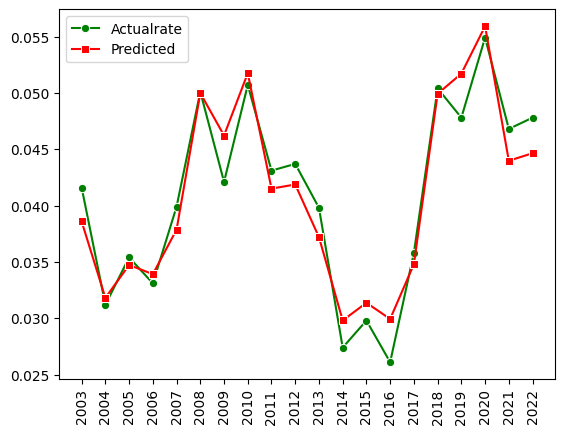

In [95]:
x=np.array(result)
forecast=np.matmul(A,x)
years = IR.Year.to_list()
sns.lineplot(x = years, y= ActualRate, palette='pastel', marker='o',color = 'green', label = 'Actualrate')
sns.lineplot(x = years, y = forecast, palette = 'pastel', marker='s', color = 'red', label = 'Predicted')
plt.xticks(years, rotation = 90)
plt.show()

In [62]:
#with lower bound of b0
l=np.array([0,-np.Inf,-np.Inf])
result_l=solve_qp(p,q,G=None,h=None,A=None,b=None,lb=l,ub=None,solver='osqp')
result_l

/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/osqp/utils.py:122: UserWarning: Converting sparse A to a CSC (compressed sparse column) matrix. (It may take a while...)
  warn("Converting sparse A to a CSC " +


array([ 0.09128332,  0.01686998, -0.00069351])

<ipython-input-96-d60bb4fefb8e>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y= ActualRate, palette='pastel', marker='o',color = 'green', label = 'Actualrate')
<ipython-input-96-d60bb4fefb8e>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y = forecast, palette = 'pastel', marker='s', color = 'red', label = 'Predicted')


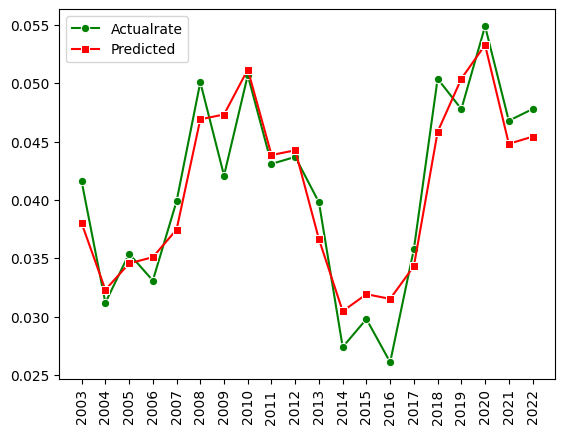

In [96]:
x1=np.array(result_l)
forecast=np.matmul(A,x1)
years = IR.Year.to_list()
sns.lineplot(x = years, y= ActualRate, palette='pastel', marker='o',color = 'green', label = 'Actualrate')
sns.lineplot(x = years, y = forecast, palette = 'pastel', marker='s', color = 'red', label = 'Predicted')
plt.xticks(years, rotation = 90)
plt.show()

In [97]:
forecast

array([0.0380174 , 0.03230713, 0.03456948, 0.03510524, 0.03746952,
       0.04692288, 0.04733355, 0.05118835, 0.04385999, 0.04426543,
       0.03663523, 0.03047342, 0.03193188, 0.03152893, 0.03434042,
       0.04584394, 0.05040107, 0.05329525, 0.04482168, 0.04543179])

In [98]:
ActualRate[1]

0.0312

In [99]:
model_2 =ConcreteModel()
model_2.constraints= ConstraintList()
model_2.x= Var(np.arange(3),domain=Reals)
model_2.u=Var(np.arange(3),domain=Reals)

model_2.objective = Objective(expr=sum(ActualRate[i]-(1*model_2.u[0]+IR.iloc[i][2]*model_2.u[1]+IR.iloc[i][3]*model_2.u[2]) for i in range(20)), sense=minimize)
for i in range(20):
  model_2.constraints.add(expr=ActualRate[i]-(1*model_2.u[0]+IR.iloc[i][2]*model_2.u[1]+IR.iloc[i][3]*model_2.u[2])>=0)
for i in range(3):


    model_2.constraints.add(expr = model_2.u[i] >= model_2.x[i])
    model_2.constraints.add(expr = model_2.u[i] >= -model_2.x[i])
    model_2.constraints.add(expr = model_2.u[i]>=0)



In [100]:
model_2.pprint()

3 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}
    u_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}

2 Var Declarations
    u : Size=3, Index=u_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True :  Reals
          1 :  None :  None :  None : False :  True :  Reals
          2 :  None :  None :  None : False :  True :  Reals
    x : Size=3, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True 

In [101]:
optOP = SolverFactory('cbc')
result_1 = optOP.solve(model_2)
print(result_1)


Problem: 
- Name: unknown
  Lower bound: 0.1762907108
  Upper bound: 0.1762907108
  Number of objectives: 1
  Number of constraints: 29
  Number of variables: 7
  Number of nonzeros: 3
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subproblems: None
    Black box: 
      Number of iterations: 4
  Error rc: 0
  Time: 0.017780542373657227
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [102]:
for i in range(3):
  print('x',[i],model_2.x[i]())
  end=''
  print('u',[i],model_2.u[i]())

x [0] 0.01150017
u [0] 0.01150017
x [1] 0.045312943
u [1] 0.045312943
x [2] 0.0
u [2] 0.0


In [103]:
print(model_2.objective())


0.17629070486360002


**Answer - 3**

In [105]:
#Op-1
model_op1 = ConcreteModel()
n = 20
model_op1.z = Var(np.arange(n))
model_op1.b= Var(np.arange(3))
model_op1.obj = Objective(expr = sum(model_op1.z[i] for i in range(n)), sense = minimize)
model_op1.constraints = ConstraintList()
for i in range(n):
  model_op1.constraints.add( expr = ActualRate[i] - model_op1.b[0] - model_op1.b[1]*IR.iloc[i][2] - model_op1.b[2]*IR.iloc[i][3] <= model_op1.z[i])
  model_op1.constraints.add( expr = -ActualRate[i] + model_op1.b[0] + model_op1.b[1]*IR.iloc[i][2] + model_op1.b[2]*IR.iloc[i][3] <= model_op1.z[i])
  model_op1.constraints.add(expr = model_op1.z[i]>=0)
model_op1.constraints.add(expr = model_op1.b[0] >= 0)
model_op1.pprint()

3 Set Declarations
    b_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   61 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61}
    z_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   20 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

2 Var Declarations
    b : Size=3, Index=b_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True :  Reals
          1 :  None :  None :  None : False :  True :  Reals
          2 :  

In [106]:
#OP2:
model_op2 = ConcreteModel()
n = 20
model_op2.x = Var(np.arange(n))
model_op2.y= Var(np.arange(n))
model_op2.b = Var(np.arange(3))
model_op2.obj = Objective(expr = sum(model_op2.x[i] + model_op2.y[i] for i in range(n)), sense = minimize)
model_op2.constraints = ConstraintList()
for i in range(n):
  model_op2.constraints.add( expr = ActualRate[i] - model_op2.b[0] - model_op2.b[1]*IR.iloc[i][2] - model_op2.b[2]*IR.iloc[i][3] == model_op2.x[i]- model_op2.y[i])
  model_op2.constraints.add(expr = model_op2.x[i]>=0)
  model_op2.constraints.add(expr = model_op2.y[i]>=0)
model_op2.constraints.add(expr = model_op2.b[0] >= 0)
model_op2.pprint()

4 Set Declarations
    b_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   61 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   20 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
    y_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   20 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

3 Var Declarations
    b : Size=3, Index=b

In [107]:
optOP = SolverFactory('cbc')
result_op1 = optOP.solve(model_op1)
print(result_op1)


Problem: 
- Name: unknown
  Lower bound: 0.0379290902
  Upper bound: 0.0379290902
  Number of objectives: 1
  Number of constraints: 61
  Number of variables: 23
  Number of nonzeros: 20
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subproblems: None
    Black box: 
      Number of iterations: 22
  Error rc: 0
  Time: 0.01565241813659668
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [108]:
model_op1.obj()

0.0379290903

In [109]:
aoptOP = SolverFactory('cbc')
result_op2= optOP.solve(model_op2)
print(result_op2)


Problem: 
- Name: unknown
  Lower bound: 0.0379290902
  Upper bound: 0.0379290902
  Number of objectives: 1
  Number of constraints: 61
  Number of variables: 43
  Number of nonzeros: 40
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subproblems: None
    Black box: 
      Number of iterations: 20
  Error rc: 0
  Time: 0.03856492042541504
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [110]:
model_op2.obj()

0.0379290903

In [79]:
bi=[]
for i in range(3):
  a=model_op1.b[i]()
  bi.append(a)
bi

[0.11547155, 0.0093102734, -0.00093012282]

In [111]:
forecast_linear=[]
for i in range(20):
  forecast_linear.append(bi[0]+IR.iloc[i][2]*bi[1]+IR.iloc[i][3]*bi[2])
forecast_linear=np.array(forecast_linear)
forecast_linear

array([0.0392187 , 0.03261876, 0.0354    , 0.03498407, 0.03853317,
       0.0501    , 0.04753498, 0.052673  , 0.0431    , 0.04348797,
       0.03779904, 0.03062147, 0.03219271, 0.03103978, 0.03538306,
       0.0497235 , 0.05240273, 0.056299  , 0.04516342, 0.04582856])

<ipython-input-114-663eeb9d5677>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y= ActualRate, palette='pastel', marker='o',color = 'green', label = 'Actual rate')
<ipython-input-114-663eeb9d5677>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y = forecast, palette = 'pastel', marker='s', color = 'yellow', label = 'Forecast')
<ipython-input-114-663eeb9d5677>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y = forecast_linear, palette = 'pastel', marker='d', color = 'blue', label = 'Forecast linear')


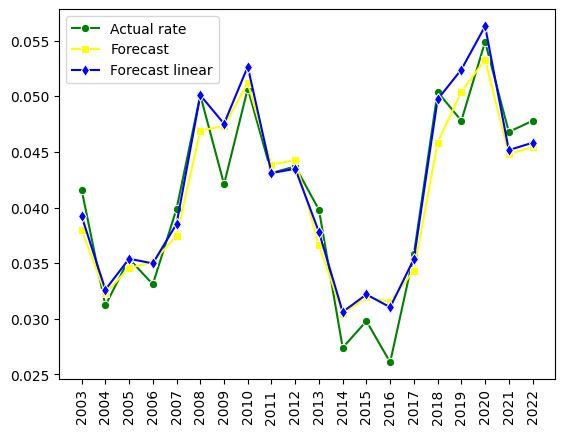

In [114]:

years = IR.Year.to_list()
sns.lineplot(x = years, y= ActualRate, palette='pastel', marker='o',color = 'green', label = 'Actual rate')
sns.lineplot(x = years, y = forecast, palette = 'pastel', marker='s', color = 'yellow', label = 'Forecast')
sns.lineplot(x = years, y = forecast_linear, palette = 'pastel', marker='d', color = 'blue', label = 'Forecast linear')
plt.xticks(years, rotation = 90)
plt.show()

**Question - 2**

In [119]:
!pip -q install qpsolvers[open_source_solvers]
from qpsolvers import solve_qp
import numpy as np

# P represents quadratic cost coefficients
P = np.array([[12.982, 0, 0, 0],
            [0, 2.4, 0, 0],
            [0, 0, 0.44, -0.051],
            [0, 0, -0.051,0.068]])
# q represents linear cost coefficients
q = np.array([-6748, -1184, -420.625, -70.41]) # it will be an array


# G matrix representation of coefficients of inequality constraints
G = np.array([[-25.964, -96, -7.08, 0.025],
            [-58.419, -2.4, -5.56, 17.39],
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 0.22, -0.025],
            [0, 0, -0.026,0.034]])
# h vector representation of capacity bounds for inequality constraints
h = np.array([59861805, 74921464, 1039.59, 986.66, 420.625,70.41]) # it will be an array

p=solve_qp(P, q, G, h, None, None, None, None,solver="osqp")

/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


In [120]:
P

array([[12.982,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  2.4  ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.44 , -0.051],
       [ 0.   ,  0.   , -0.051,  0.068]])

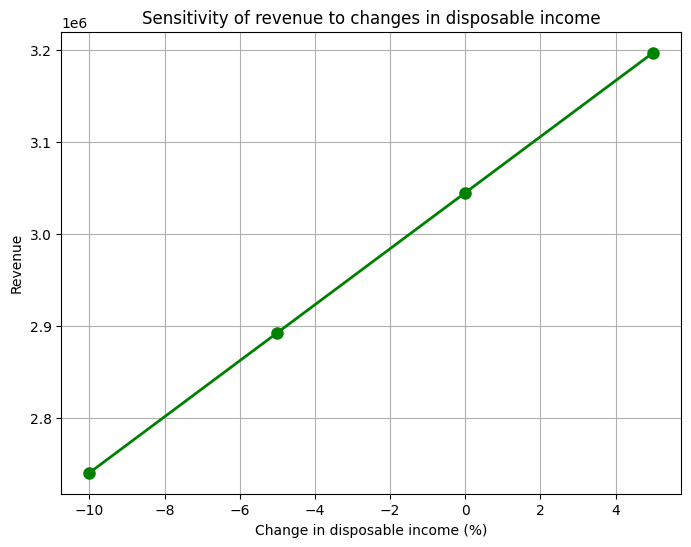

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming optimal_prices contains the optimal prices calculated previously
optimal_prices = p

# Define the range of change in disposable income (-10% to 10%)
disposable_income_change = np.arange(-0.10, 0.06, 0.05)

# Calculate revenue for each change in disposable income
revenues = []
for change in disposable_income_change:
    # Calculate new prices based on the change in disposable income
    new_prices = optimal_prices * (1 + change)
    # Calculate revenue using the new prices and last year's consumption data
    revenue = np.dot(new_prices, np.array([4820, 320, 210,70]))  # Assuming last year's consumption data for P1, P2, P3
    revenues.append(revenue)

# Plot the sensitivity curve
plt.figure(figsize=(8, 6))
plt.plot(disposable_income_change * 100, revenues, marker='o', color='g', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Change in disposable income (%)')
plt.ylabel('Revenue')
plt.title('Sensitivity of revenue to changes in disposable income')
plt.grid(True)
plt.show()

**Question 3(A1)**

Pareto-Frontier Points (Return, Risk):
(0.02329635771240516, 0.020673499242195845)
(0.025185147533601387, 0.020438277480799478)
(0.024071735912466218, 0.019794593050237258)
(0.024546098321439804, 0.01975803689932704)
(0.024326873299103526, 0.0196537805469832)
(0.02429083920019085, 0.019653774309288906)
(0.0240206951881873, 0.019652900584369762)
(0.02411132873356347, 0.01965220943274332)
(0.024253457288098235, 0.01965202595605612)


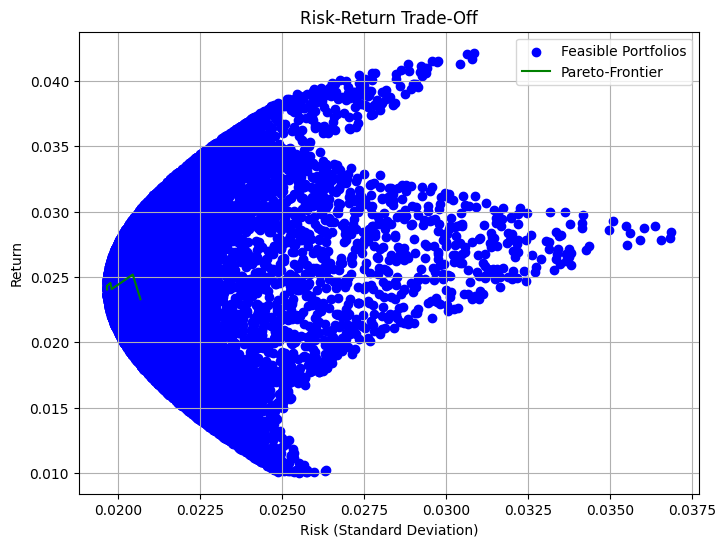

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


M = np.array([4.27, 0.15, 2.85]) / 100
Sigma = np.array([[10, 0.18, 0.11],
                  [0.12, 10.44, 0.26],
                  [0.11, 0.26, 14.11]]) / 10000

iterations = 10000

M0 = 0.01

# Random search algorithm
results = []
for _ in range(iterations):
    weights = np.random.rand(3)
    weights /= weights.sum()
    portfolio_return = np.dot(weights, M)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(Sigma, weights)))
    if portfolio_return >= M0:
        results.append((portfolio_return, portfolio_risk))

# Separate the results into return and risk
return_values, risk_values = zip(*results)

# Plot the risk-return trade-off and the Pareto-Frontier
plt.figure(figsize=(8, 6))
plt.scatter(risk_values, return_values, label="Feasible Portfolios", color="blue", marker="o")
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Return")
plt.title("Risk-Return Trade-Off")
plt.grid(True)

# Calculate Pareto-Frontier
pareto_frontier = []
min_risk = float('inf')
for r, risk in results:
    if risk < min_risk:
        pareto_frontier.append((r, risk))
        min_risk = risk

# Separate the Pareto-Frontier into return and risk
pareto_return, pareto_risk = zip(*pareto_frontier)
plt.plot(pareto_risk, pareto_return, label="Pareto-Frontier", color="green", linestyle="-")
plt.legend()

# Print Pareto-Frontier points
print("Pareto-Frontier Points (Return, Risk):")
for point in pareto_frontier:
    print(point)

plt.show()

**Question 3(A3)**

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Given data
M = np.array([4.27, 0.15, 2.85]) / 100  # Mean returns (as decimals)
Sigma = np.array([[10, 0.18, 0.11],
                  [0.12, 10.44, 0.26],
                  [0.11, 0.26, 14.11]]) / 10000  # Covariance matrix (as decimals)

# Parameters
N = 100  # Number of lambda values to consider
returns = []
risks = []

# Loop through different values of nu to calculate lambda
for nu in range(1, N + 1):
    lambda_val = 10**(5 * (nu / N) - 1)

    # Define utility function to maximize
    def utility(w):
        portfolio_return = np.dot(w, M)
        portfolio_risk = np.sqrt(np.dot(w.T, np.dot(Sigma, w)))
        return -portfolio_return + 0.5 * lambda_val * portfolio_risk**2

    # Initial guess for portfolio weights
    initial_weights = np.ones(len(M)) / len(M)

    # Constraints
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
                   {'type': 'ineq', 'fun': lambda w: w})

    # Solve the optimization problem
    result = minimize(utility, initial_weights, constraints=constraints)

    # Append results to lists
    returns.append(-result.fun)  # Negative sign due to maximization
    risks.append(np.sqrt(np.dot(result.x.T, np.dot(Sigma, result.x))))

# Plot the Pareto-Frontier trajectory
plt.figure(figsize=(10, 6))
plt.scatter(risks, returns, marker='o', label='Pareto-Frontier', color='yellow')
plt.xlabel('Standard_deviation of risk')
plt.ylabel('Expected Return')
plt.title('Pareto-Frontier')

Question - 3(B)

Text(0.5, 1.0, 'Pareto-Frontier')

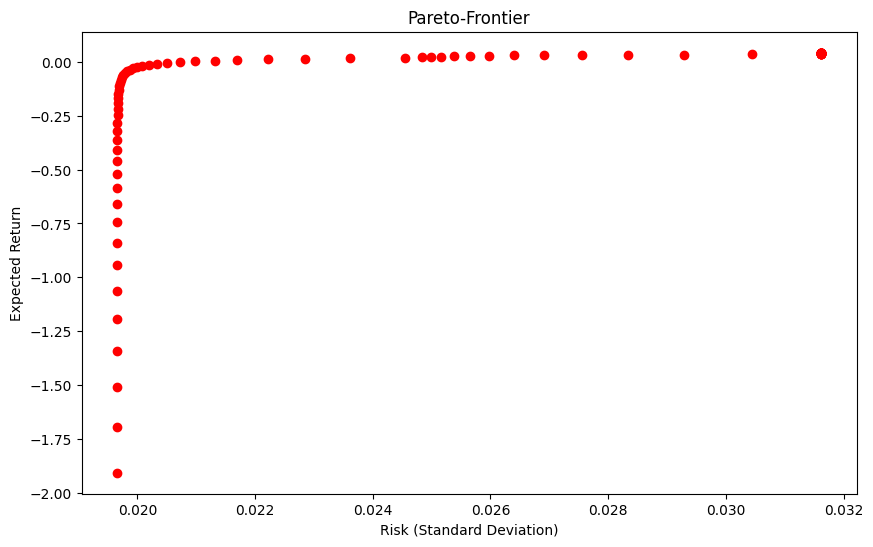

In [ ]:
import cvxpy as cp
import numpy as np

# Given data
tax_base = np.array([34329, 3269, 811, 702, 2935, 30809, 4200])
coefficients = np.array([
    [12.61, 0.108, 0],
    [10.16, 0.020, 0.276],
    [10.97, 0.044, 0],
    [9.79, 0.027, 0.102],
    [10.37, 0.036, 0],
    [11.89, 0.160, 0],
    [211.09, 0.112, 0]
])
variance_covariance = np.array([
    [0.00070, -0.00007, 0.00108, -0.00002, 0.00050, 0.00114, 0.00105],
    [-0.00007, 0.00115, 0.00054, -0.00002, 0.00058, -0.00055, 0.00139],
    [0.00108, 0.00054, 0.00279, 0.00016, 0.00142, 0.00112, 0.00183],
    [-0.00002, -0.00002, 0.00016, 0.00010, 0.00009, -0.00007, -0.00003],
    [0.00050, 0.00058, 0.00142, 0.00009, 0.00156, 0.00047, 0.00177],
    [0.00114, -0.00055, 0.00112, -0.00007, 0.00047, 0.00274, 0.00177],
    [0.00105, 0.00139, 0.00183, -0.00003, 0.00177, 0.00177, 0.00652]
])

# Constraints
T = 3300  # Total expected tax revenue
u = np.array([2 * base for base in tax_base])  # Upper bounds

# Solve the optimization problem for g = 9%
g_values = [0.09, 0.13]  # Growth rates
for g in g_values:
    x = cp.Variable(len(tax_base))
    Q = cp.quad_form(x, variance_covariance)
    objective = cp.Minimize(Q)
    constraints = [x >= 0, x <= u, cp.sum(x) == T, cp.sum(x * coefficients[:, 1]) / T == g]

    problem = cp.Problem(objective, constraints)
    problem.solve()

    # Output optimal tax rates
    print(f"Optimal Tax Rates for g = {g * 100}%:")
    print("Tax Rate for Sales Tax:", x[0].value)
    print("Tax Rate for Motor Fuel Tax:", x[1].value)
    print("Tax Rate for Alcoholic Beverages Tax:", x[2].value)
    print("Tax Rate for Tobacco Tax:", x[3].value)
    print("Tax Rate for Motor Vehicle Tax:", x[4].value)
    print("Tax Rate for Personal Income Tax:", x[5].value)
    print("Tax Rate for Corporate Tax:", x[6].value)
    print("Total Tax Revenue:", T)
    print("=" * 40)

In [ ]:
import cvxpy as cp
import numpy as np

# Given data
M = np.array([4.27, 0.15, 2.85]) / 100  # Mean returns (as decimals)
Sigma = np.array([[10, 0.18, 0.11],
                  [0.18, 10.44, 0.26],
                  [0.11, 0.26, 14.11]]) / 10000  # Covariance matrix (as decimals)
N = 100  # Number of lambda values
num_assets = len(M)

# Initialize variables
x = cp.Variable(num_assets)  # Portfolio weights
Lambda_values = [10 ** (5 * (nu / N) - 1) for nu in range(1, N + 1)]  # Lambda values

# Define the objective function and constraints for each lambda value
optimal_portfolios = []
for idx, Lambda in enumerate(Lambda_values):
    objective = cp.Maximize(x.T @ M - Lambda * cp.quad_form(x, Sigma))
    constraints = [cp.sum(x) == 1, x >= 0]  # Sum of weights equals 1, and weights are non-negative

    # Solve the optimization problem for the current lambda value
    problem = cp.Problem(objective, constraints)
    problem.solve(solver=cp.ECOS)

    # Save the optimal portfolio weights and objective value
    optimal_portfolios.append((x.value, problem.value))

# Print the optimal portfolios for each lambda value
for idx, (portfolio, objective_value) in enumerate(optimal_portfolios):
    print(f"Optimal Portfolio for Lambda = {Lambda_values[idx]}:")
    print("Weights:", portfolio)
    print("Objective Value:", objective_value)
    print("=" * 40)

Optimal Portfolio for Lambda = 0.11220184543019636:
Weights: [9.99999999e-01 1.65382421e-10 4.27716806e-10]
Objective Value: 0.04258779814181388
Optimal Portfolio for Lambda = 0.12589254117941673:
Weights: [1.00000000e+00 1.38364384e-10 3.44727643e-10]
Objective Value: 0.042574107448344896
Optimal Portfolio for Lambda = 0.14125375446227545:
Weights: [1.00000000e+00 1.12325627e-10 2.66148246e-10]
Objective Value: 0.0425587462372361
Optimal Portfolio for Lambda = 0.15848931924611134:
Weights: [1.00000000e+00 9.00874831e-11 2.01271807e-10]
Objective Value: 0.04254151067427531
Optimal Portfolio for Lambda = 0.1778279410038923:
Weights: [1.00000000e+00 7.31615795e-11 1.55295436e-10]
Objective Value: 0.04252217205385678
Optimal Portfolio for Lambda = 0.19952623149688797:
Weights: [1.00000000e+00 6.63144886e-11 1.37214976e-10]
Objective Value: 0.04250047376390257
Optimal Portfolio for Lambda = 0.223872113856834:
Weights: [1.00000000e+00 7.17040282e-11 1.51311824e-10]
Objective Value: 0.042476